In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

%matplotlib inline

In [140]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2)

/Users/ntmktd30/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [141]:
gdp_df['Country'] = gdp_df.Country.astype(str)

AttributeError: 'DataFrame' object has no attribute 'Country'

In [142]:
gdp_df['Year'].astype(int)

0       2018
1       2017
2       2016
3       2015
4       2014
        ... 
6724    1994
6725    1993
6726    1992
6727    1991
6728    1990
Name: Year, Length: 6729, dtype: int64

In [9]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [11]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python')

In [172]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis=1)

In [173]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [174]:
gdp_df.shape

(6729, 3)

In [175]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [176]:
gdp_df['Year'].value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

In [177]:
gdp_df['Country'].value_counts()

East Asia & Pacific (IDA & IBRD)    29
New Zealand                         29
Jamaica                             29
South Africa                        29
Niger                               29
                                    ..
Nauru                               12
Sint Maarten (Dutch part)            9
Turks and Caicos Islands             8
South Sudan                          8
Djibouti                             1
Name: Country, Length: 243, dtype: int64

In [178]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [179]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


In [180]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


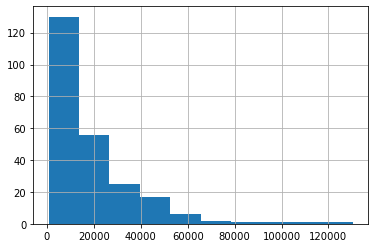

In [181]:
gdp_2014['GDP_Per_Capita'].hist()

In [182]:
gdp_90_17 = gdp_df[
    (gdp_df['Year'] >= 1990)
    &(gdp_df['Year'] <= 2017)
    &(gdp_df['GDP_Per_Capita'].notnull())
    &(gdp_df['Year'].notnull())
 ]

In [183]:
gdp_90_17_pivot = gdp_90_17.pivot_table(index='Country', columns=['Year'], values='GDP_Per_Capita')[[1990, 2017]]

In [184]:
gdp_pivoted = gdp_pivoted.dropna()

In [185]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
...,...,...,...
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298
Yemen,3425.707169,2404.422370,-29.812379


In [186]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [187]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
...,...,...,...
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298
Yemen,3425.707169,2404.422370,-29.812379


In [188]:
len(gdp_pivoted[gdp_pivoted['Percent_Change'] < 0])

20

In [189]:
gdp_pivoted.sort_values('Percent_Change', ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
...,...,...,...
Ukraine,10463.959955,7906.540301,-24.440266
Yemen,3425.707169,2404.422370,-29.812379
Burundi,1027.396660,670.777072,-34.710993


In [190]:
gdp_pivoted.loc[['Equatorial Guinea', 'China']]

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241


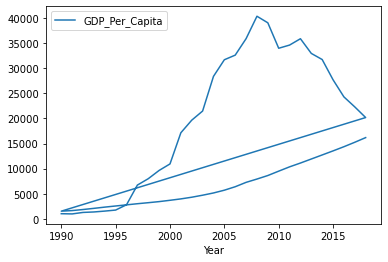

In [191]:
gdp_df[
    (gdp_df['Country'] == 'Equatorial Guinea')
    |(gdp_df['Country'] == 'China')
].plot.line(x='Year', y='GDP_Per_Capita')

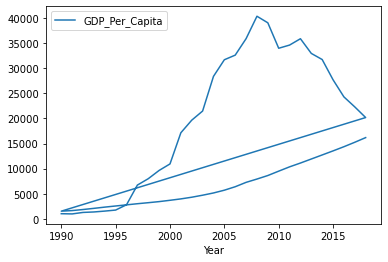

In [116]:
gdp_df[
    (gdp_df['Country'] == 'Equatorial Guinea')
    |(gdp_df['Country'] == 'China')
].set_index('Year').plot.line()

In [192]:
continents = pd.read_csv('../data/continents.csv')

In [194]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


In [204]:
gdp_df = gdp_df.merge(continents, on='Country')

In [210]:
import seaborn as sns

In [214]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia
...,...,...,...,...
5329,Zimbabwe,1994,2768.309953,Africa
5330,Zimbabwe,1993,2572.870395,Africa
5331,Zimbabwe,1992,2591.007534,Africa
5332,Zimbabwe,1991,2906.272849,Africa


In [216]:
gdp_continent = gdp_df[
    gdp_df['Year']==2014
].groupby('Continent').agg(CountryCount=('Country', 'count'), GDPMean=('GDP_Per_Capita', 'mean'))

In [220]:
gdp_continent

,CountryCount,GDPMean
Continent,,
Africa,49,5833.237803
Asia,44,25385.607825
Europe,45,29916.660583
North America,25,20045.951921
Oceania,14,10346.108751
South America,12,14026.919827


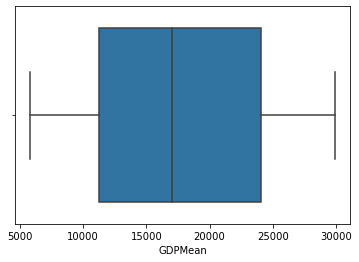

In [221]:
sns.boxplot(data = gdp_continent, x = 'GDPMean');

In [255]:
internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines=False)

b'Skipping line 4675: expected 4 fields, saw 6\n'


In [256]:
internet_df = internet_df[internet_df['Year'].apply(lambda x: x.isnumeric())]

In [257]:
internet_df = internet_df.drop(['Value Footnotes'], axis=1)

In [259]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [260]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [262]:
internet_df.shape

(4495, 3)

In [263]:
internet_df['Internet_Users_Pct']

0       6.390000
1       5.900000
2       5.454545
3       5.000000
4       4.000000
          ...   
4490    0.033080
4491    0.016790
4492    0.007684
4493    0.001739
4494    0.000000
Name: Internet_Users_Pct, Length: 4495, dtype: float64

In [ ]:
internet_df.sort_values()